In [14]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
parent = '/Users/shah38/Desktop/xai-geom/nt3/'
# directory = parent + 'pickle_summit_35'
# counterfactuals = []
# count = 0
# for filename in os.listdir(directory):
#     if filename.startswith("save"):
#         count+=1
#         d = pickle.load(open(os.path.join(directory, filename), 'rb'))
#         counterfactuals.append(d)

In [5]:
test = [item for sublist in counterfactuals for item in sublist]

In [6]:
print(len(test))

1160


In [8]:
print(count)

29


In [7]:
data = pickle.load(open("nt3.autosave.data.pkl",'rb'))
print(data[0].shape)

FileNotFoundError: [Errno 2] No such file or directory: 'nt3.autosave.data.pkl'

In [8]:
pickle.dump(test, open("complete_save.pkl", 'wb'))

In [18]:
# Plot # of positive/negative indices per threshold value
# Pick a threshold
# Find genes that overlap the most
num_pos = []
num_neg = []
#threshold_values = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
threshold_values = [0.9]#, 0.925, 0.95, 0.975, 1.0]
for t in threshold_values:
    thresholds = pickle.load(open('{}threshold_{}.pkl'.format(parent,t), 'rb'))
    pos = thresholds['positive threshold indices']
    num_pos.append([pos[i][0].shape[0] for i in range(len(pos))])
    neg = thresholds['negative threshold indices']
    num_neg.append([neg[i][0].shape[0] for i in range(len(neg))])

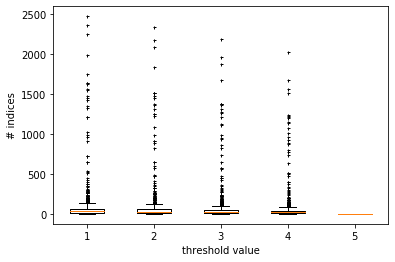

In [14]:
fig, ax = plt.subplots()
pos = np.arange(len(num_pos)) + 1
total = [np.array(num_pos[i]) + np.array(num_neg[i]) for  i in range(len(num_pos)) ]
bp = ax.boxplot(total, sym='k+', positions=pos)

ax.set_xlabel('threshold value')
ax.set_ylabel('# indices')
#ax.set_xticks(np.arange(0,1.1,0.1))
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

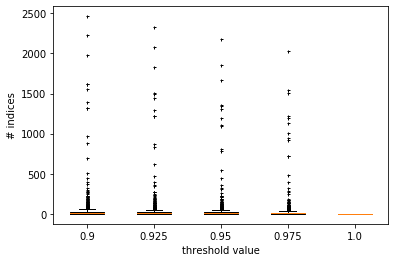

In [45]:
fig, ax = plt.subplots()
pos = np.arange(len(num_pos)) + 1
bp = ax.boxplot(num_pos, sym='k+', positions=pos)

ax.set_xlabel('threshold value')
ax.set_xticklabels([0.9,0.925,0.95,0.975,1.0])
ax.set_ylabel('# indices')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

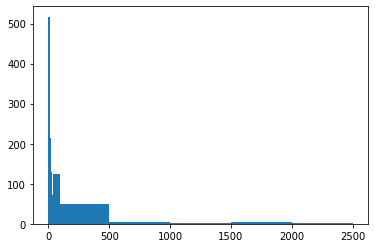

In [19]:
plt.hist(num_pos[0], bins=[0,10,20,30,40,100,500,1000,1500,2000,2500])
num_pos_9 = np.array(num_pos[0])
indices_pos_9 = np.argwhere((num_pos_9 <= 20) & (num_pos_9 > 10))

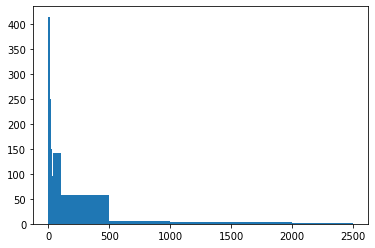

In [20]:
plt.hist(num_neg[0], bins=[0,10,20,30,40,100,500,1000,1500,2000,2500])
num_neg_9 = np.array(num_neg[0])
indices_neg_9 = np.argwhere((num_neg_9 <= 20) & (num_neg_9 > 10))

In [21]:
# These are the counterfactuals that have between 10 and 20 pos/neg perturbations > 0.9*max
overlap = list(set(np.squeeze(indices_pos_9)).intersection(set( np.squeeze(indices_neg_9))))
print(overlap)

[642, 1027, 258, 134, 394, 1046, 279, 536, 791, 923, 798, 676, 682, 811, 556, 812, 432, 694, 55, 314, 957, 1093, 197, 591, 93, 735, 357, 1017, 634, 638, 767]


In [1]:
thresholds_9 = pickle.load(open('{}threshold_{}.pkl'.format(parent,0.9), 'rb'))
genes_pos = []
genes_neg = []
perturb_vector=[]
cf_class = []
for i in overlap:
    genes_pos.append(thresholds_9['positive threshold indices'][i])
    genes_neg.append(thresholds_9['negative threshold indices'][i])
    perturb_vector.append(thresholds_9['perturbation vector'][i])
    cf_class.append(thresholds_9['counterfactual class'][i])

NameError: name 'pickle' is not defined

In [23]:
# These are the set of genes (indices) that have been perturbed more than 0.9*max perturbation
# in the counterfactual example 

# split by class
genes_pos_0 = []
genes_neg_0 = []
perturb_vector_0=[]
genes_pos_1 = []
genes_neg_1 = []
perturb_vector_1=[]
for i,j,k,l in zip(genes_pos, genes_neg, perturb_vector, cf_class):
    if l==0:
        genes_pos_0.append(i)
        genes_neg_0.append(j)
        perturb_vector_0.append(k)
    else:
        genes_pos_1.append(i)
        genes_neg_1.append(j)
        perturb_vector_1.append(k)
print(len(genes_neg_0), len(genes_neg_1))

18 13


In [37]:
# cluster the counterfactual examples
num_clusters = 1
kmeans_0 = KMeans(n_clusters=num_clusters, random_state=0).fit(perturb_vector_0)
kmeans_1 = KMeans(n_clusters=num_clusters, random_state=0).fit(perturb_vector_1)

In [38]:
for i in range(len(kmeans_0.cluster_centers_)):
    diff_1=kmeans_1.cluster_centers_[i]
    max_value = np.max(np.abs(diff_1))
    ind_pos = np.where(diff_1 > 0.9*max_value)
    ind_neg = np.where(diff_1 < -0.9*max_value)
    pickle.dump([ind_pos, ind_neg], open("{}cf_class_1.pkl".format(parent), "wb"))
    diff_0=kmeans_1.cluster_centers_[i]
    max_value = np.max(np.abs(diff_0))
    ind_pos = np.where(diff_1 > 0.9*max_value)
    ind_neg = np.where(diff_1 < -0.9*max_value)
    pickle.dump([ind_pos, ind_neg],open("{}cf_class_0.pkl".format(parent), "wb"))

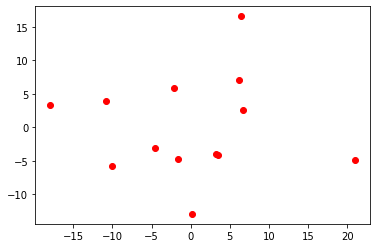

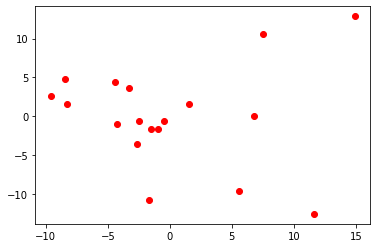

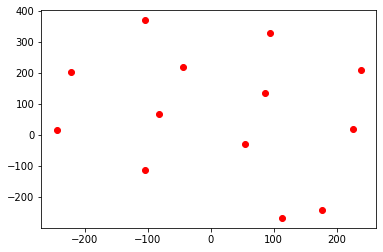

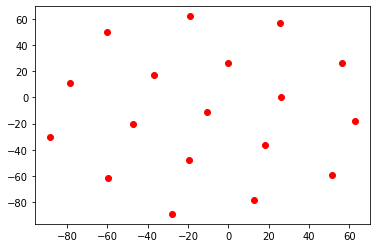

In [39]:
# PCA/tsne for high dimensional data (60k dims) does not really work well...
pca = PCA(2)
tsne = TSNE(n_components=2)
tsne_fit_1 = tsne.fit_transform(perturb_vector_1)
tsne_fit_0 = tsne.fit_transform(perturb_vector_0)
pca_fit_1 = pca.fit_transform(perturb_vector_1)
pca_fit_0 = pca.fit_transform(perturb_vector_0)
label_1 = kmeans_1.predict(perturb_vector_1)
label_0 = kmeans_0.predict(perturb_vector_0)
colors = ['r','g','b','c','y']
for i in np.arange(num_clusters):
    plt.scatter(pca_fit_1[label_1==i][:,0], pca_fit_1[label_1==i][:,1], color=colors[i])
plt.show()
for i in np.arange(num_clusters):
    plt.scatter(pca_fit_0[label_0==i][:,0], pca_fit_0[label_0==i][:,1], color=colors[i])
plt.show()
for i in np.arange(num_clusters):
    plt.scatter(tsne_fit_1[label_1==i][:,0], tsne_fit_1[label_1==i][:,1], color=colors[i])
plt.show()
for i in np.arange(num_clusters):
    plt.scatter(tsne_fit_0[label_0==i][:,0], tsne_fit_0[label_0==i][:,1], color=colors[i])
plt.show()

In [21]:
print(genes_pos_0[0][0])

[ 1981  3535  5008  8364 11864 13916 15069 15253 21367 24170 28987 33326
 34237 37660 39210 40684 43098 45503]


In [129]:
# within each cluster determine the overlapping gene indices that have been perturbed
for i in np.arange(num_clusters):
    in_cluster_0 = np.argwhere(kmeans_0.labels_==i).squeeze()
    genes_pos_0_sets = []
    genes_neg_0_sets = []
    for j in in_cluster_0:
        genes_pos_0_sets.append(set(genes_pos_0[j][0]))
        genes_neg_0_sets.append(set(genes_neg_0[j][0]))
    overlap_pos_0 = list(genes_pos_0_sets[0].intersection(*genes_pos_0_sets))
    overlap_neg_0 = list(genes_neg_0_sets[0].intersection(*genes_neg_0_sets))
    print("CF=0, Number of overlapping positive genes for cluster {}: {}".format(i,len(overlap_pos_0)))
    print("CF=0, Number of overlapping negative genes for cluster {}: {}".format(i,len(overlap_neg_0)))

for i in np.arange(num_clusters):
    in_cluster_1 = np.argwhere(kmeans_1.labels_==i).squeeze()
    genes_pos_1_sets = []
    genes_neg_1_sets = []
    for j in in_cluster_1:
        genes_pos_1_sets.append(set(genes_pos_1[j][0]))
        genes_neg_1_sets.append(set(genes_neg_1[j][0]))
    overlap_pos_1 = list(genes_pos_1_sets[0].intersection(*genes_pos_1_sets))
    overlap_neg_1 = list(genes_neg_1_sets[0].intersection(*genes_neg_1_sets))
    print("CF=1, Number of overlapping positive genes for cluster {}: {}".format(i,len(overlap_pos_1)))
    print("CF=1, Number of overlapping negative genes for cluster {}: {}".format(i,len(overlap_neg_1)))

CF=0, Number of overlapping positive genes for cluster 0: 0
CF=0, Number of overlapping negative genes for cluster 0: 0
CF=0, Number of overlapping positive genes for cluster 1: 0
CF=0, Number of overlapping negative genes for cluster 1: 0
CF=0, Number of overlapping positive genes for cluster 2: 0
CF=0, Number of overlapping negative genes for cluster 2: 0
CF=0, Number of overlapping positive genes for cluster 3: 0
CF=0, Number of overlapping negative genes for cluster 3: 0
CF=0, Number of overlapping positive genes for cluster 4: 0
CF=0, Number of overlapping negative genes for cluster 4: 0
CF=1, Number of overlapping positive genes for cluster 0: 2
CF=1, Number of overlapping negative genes for cluster 0: 0
CF=1, Number of overlapping positive genes for cluster 1: 0
CF=1, Number of overlapping negative genes for cluster 1: 0
CF=1, Number of overlapping positive genes for cluster 2: 0
CF=1, Number of overlapping negative genes for cluster 2: 0
CF=1, Number of overlapping positive gen

In [ ]:
# Not many overlapping genes which means that clustering doesnt give <<perfect>> correlation to 
# highly perturbed genes, but there may be some statistical methods to find which gene perturbations
# are <<most present>> in each cluster

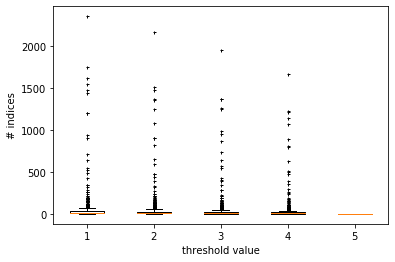

In [126]:
fig, ax = plt.subplots()
pos = np.arange(len(num_pos)) + 1
bp = ax.boxplot(num_neg, sym='k+', positions=pos)

ax.set_xlabel('threshold value')
ax.set_ylabel('# indices')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

In [60]:
thresholds = pickle.load(open("threshold.complete.pkl",'rb'))

In [61]:
print(thresholds['positive threshold indices'][0][0].shape[0])

683


In [14]:
diff = thresholds['perturbation vector']
print(len(diff))

1120


In [16]:
kmeans.labels_ 

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)